In [10]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "aimdatathon2020"

In [2]:
background <- read.csv('../input/aimdatathon2020/Background and Helpful Info.csv',header=T)
beverages <- read.csv('../input/aimdatathon2020/Beverages.csv',header=T)
lifestyle <- read.csv('../input/aimdatathon2020/Current Lifestyle.csv',header=T)
dbbr<- read.csv('../input/aimdatathon2020/DBBR Questionnaire Data Dictionary.csv',header=T)
exercise<- read.csv('../input/aimdatathon2020/Exercise.csv',header=T)
family<- read.csv('../input/aimdatathon2020/Family History.csv',header=T)
food_hab<- read.csv('../input/aimdatathon2020/Food Habits.csv',header=T)
food<- read.csv('../input/aimdatathon2020/Foods.csv',header=T)
herbal<- read.csv('../input/aimdatathon2020/Herbals.csv',header=T)
supplements<- read.csv('../input/aimdatathon2020/Lifetime use of Supplements.csv',header=T)
medical<- read.csv('../input/aimdatathon2020/MedicalHistory.csv',header=T)
medication<- read.csv('../input/aimdatathon2020/MedicationUseHistory.csv',header=T)
multi_vit<- read.csv('../input/aimdatathon2020/Multivitamins.csv',header=T)
nutrient<- read.csv('../input/aimdatathon2020/Nutrient Calc.csv',header=T)
smoking<- read.csv('../input/aimdatathon2020/Smoking History.csv',header=T)
tumor_test<- read.csv('../input/aimdatathon2020/Tumor Information_test.csv',header=T)
tumor_train<- read.csv('../input/aimdatathon2020/Tumor Information_train.csv',header=T)
vit_min<- read.csv('../input/aimdatathon2020/Vitamins Minerals.csv',header=T)
womens<- read.csv('../input/aimdatathon2020/WomensHealth.csv',header=T)

Load all data into the jupyter notebook

In [3]:
names(background) <- toupper(names(background))
names(beverages) <- toupper(names(beverages))
names(lifestyle) <- toupper(names(lifestyle))
names(dbbr) <- toupper(names(dbbr))
names(exercise) <- toupper(names(exercise))
names(family) <- toupper(names(family))
names(food_hab) <- toupper(names(food_hab))
names(food) <- toupper(names(food))
names(herbal) <- toupper(names(herbal))
names(supplements) <- toupper(names(supplements))
names(medical) <- toupper(names(medical))
names(medication) <- toupper(names(medication))
names(multi_vit) <- toupper(names(multi_vit))
names(nutrient) <- toupper(names(nutrient))
names(smoking) <- toupper(names(smoking))
names(tumor_test) <- toupper(names(tumor_test))
names(tumor_train) <- toupper(names(tumor_train))
names(vit_min) <- toupper(names(vit_min))
names(womens) <- toupper(names(womens))

Convert all column names to uppercase, so that they can all be unified on 'QBARCODE', rather than some being 'qbarcode' and not merging properly 

In [11]:
library(plyr)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




load library needed

In [12]:
smoking$OCCUP<-revalue(smoking$OCCUP,replace=c('HOUSEWIFE CHAIR FACTORY'='FACTORY','PLASTIC FACTORY'='FACTORY','SPECIAL EDUCATION TEACHER'='TEACHER','SECONDARY TEACHER'='TEACHER','INDUSTRIAL'='FACTORY','HOMEMAKER AND MOTHER'='HOUSEWIFE','WAITRESS OR BARTENDER'='WAITER','INSTRUMENTAL MUSIC TEACHER'='TEACHER','MACHINIST'='FACTORY','MACHINE OPERATOR'='FACTORY','WAITRESS'='WAITER','WAITRESS/BARTENDER'='WAITER','BANK TELLER' = 'BANKING','ELEMENTARY SCHOOL TEACHER'='TEACHER','MATH TEACHER'='TEACHER','HIGH SCHOOL SPANISH TEACHER'='TEACHER','HOUSEWIFE HOMEMAKER'='HOUSEWIFE','HOUSE WIFE'='HOUSEWIFE','HOMEMAKER WIFE MOTHER'='HOUSEWIFE','HOUSEWIFE AND MOTHER'='HOUSEWIFE','STAY AT HOME MOM'='HOUSEWIFE','FACTORY WORKER'='FACTORY','FACTOR WORKER'='FACTORY','FACTORY GM'='FACTORY','PRODUCTION FACTORY'='FACTORY','DOOR FACTORY'='FACTORY'))

Do some cleaning, in unifying some occupation names. For example, both a math teacher and a spanish teacher should be recognized as a teacher. Necessary so that there aren't quite so many different categories later on.

In [13]:
com1=merge(background,beverages,by='QBARCODE')
com3=merge(com1,lifestyle,by='QBARCODE')
#com3=merge(com2,dbbr,by='QBARCODE')
com4=merge(com3,exercise,by='QBARCODE')
com5=merge(com4,family,by='QBARCODE')
com6=merge(com5,food_hab,by='QBARCODE')
com7=merge(com6,food,by='QBARCODE')
com8=merge(com7,herbal,by='QBARCODE')
com9=merge(com8,supplements,by='QBARCODE')
com10=merge(com9,medical,by='QBARCODE')
com11=merge(com10,medication,by='QBARCODE')
com12=merge(com11,multi_vit,by='QBARCODE')
com13=merge(com12,nutrient,by='QBARCODE')
com14=merge(com13,smoking,by='QBARCODE')
com15=merge(com14,vit_min,by='QBARCODE')
com16=merge(com15,womens,by='QBARCODE')
tumor_train_all=merge(com16,tumor_train,by='QBARCODE')

Merge all the data for the training data

In [14]:
com1=merge(background,beverages,by='QBARCODE')
com3=merge(com1,lifestyle,by='QBARCODE')
#com3=merge(com2,dbbr,by='QBARCODE')
com4=merge(com3,exercise,by='QBARCODE')
com5=merge(com4,family,by='QBARCODE')
com6=merge(com5,food_hab,by='QBARCODE')
com7=merge(com6,food,by='QBARCODE')
com8=merge(com7,herbal,by='QBARCODE')
com9=merge(com8,supplements,by='QBARCODE')
com10=merge(com9,medical,by='QBARCODE')
com11=merge(com10,medication,by='QBARCODE')
com12=merge(com11,multi_vit,by='QBARCODE')
com13=merge(com12,nutrient,by='QBARCODE')
com14=merge(com13,smoking,by='QBARCODE')
com15=merge(com14,vit_min,by='QBARCODE')
com16=merge(com15,womens,by='QBARCODE')
tumor_test_all=merge(com16,tumor_test,by='QBARCODE')

Merge all test data

In [15]:
library(rpart)

Load needed library

In [16]:
model.control <- rpart.control(minsplit=15, xval=10, cp=0)

tree.fit<- rpart(as.factor(PATIENTSTATUS)~.-QBARCODE, data=tumor_train_all, method='class', control = model.control)

Construct a decision tree using all variables, except for the identifying barcode. A decision tree is essentially a path to follow to get to an answer, for example to figure out if an animal is a dog, you may check: Does this animal have a tail? Does this animal have 4 legs? does this animal have long ears? until you have narrowed it down enough to say it is a dog.

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”


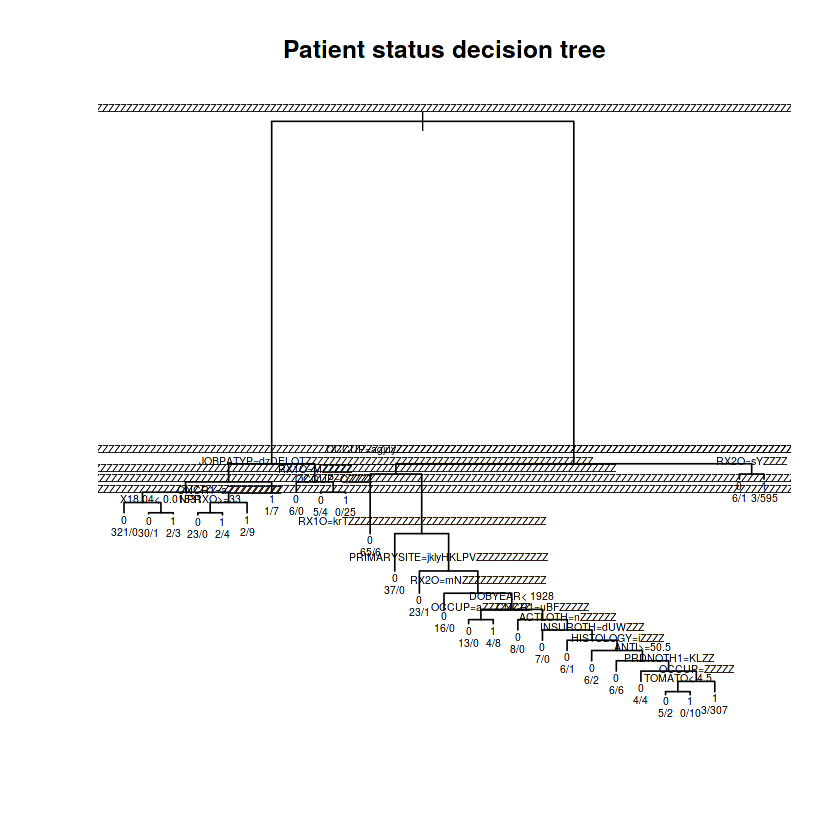

In [17]:
plot(tree.fit,main='Patient status decision tree')
text(tree.fit, use.n=TRUE, cex = .5)

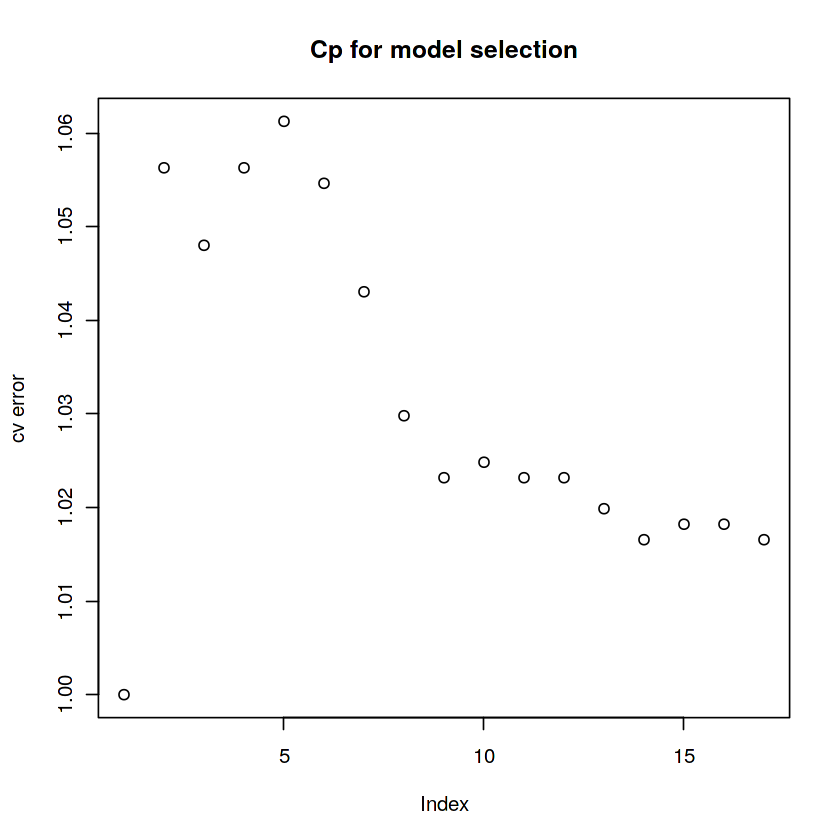

In [49]:
plot(tree.fit$cptable[,4], main = "Cp for model selection", ylab = 'cv error')


A plot of the cp values for this decision tree. Basically shows how good of an estimator the model is against how complex the model is. Shows that the model with an index of 9 is just about as good of an estimator as any later index, but is a lot simpler, as 9 is less than 15 or any of the other higher indexes.

In [19]:
prune.status <- prune(tree.fit, cp = tree.fit$cptable[9, 1])

Use that 9th index value to "prune" the tree. Essentially simplify it.

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”


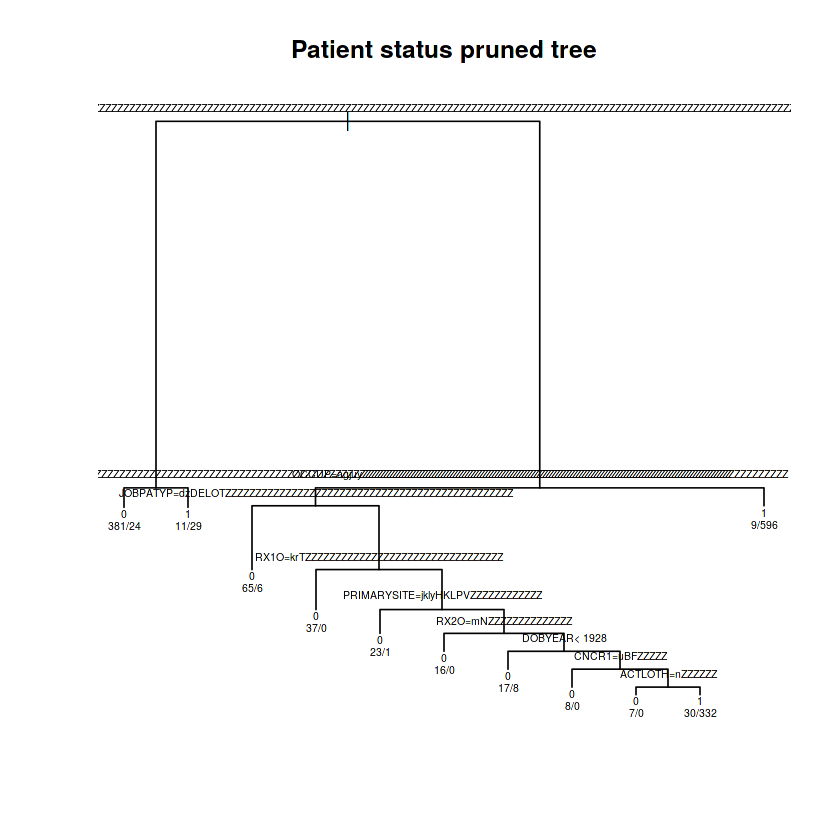

In [20]:
plot(prune.status, main='Patient status pruned tree')
text(prune.status, use.n=TRUE, cex = .5)

Plot the pruned tree

In [21]:
prune.status$variable.importance

OCCUP    JOBPATYP        RX1O        RX2O       CNCR1     RX1OTH1 
 384.723397  223.040204  136.249228  113.911054  105.919932   89.012350 
PRIMARYSITE     ACTLOTH       CNCR2     RX2OTH1     DOBYEAR    PRDNOTH1 
  38.004888   25.231283   20.315685   15.847624   14.738327   10.009418 
  HISTOLOGY         AGE    CNCR1STD     ACETOTH    CNCR2STD     IBPROTH 
   9.469880    7.074397    6.758753    4.950995    3.300663    3.300663 
   INSUROTH     RX1OTH2        OCX1     ACDROTH       BRND1     COUNTRY 
   2.763735    2.751791    1.650332    1.584669    1.584669    1.179066

This shows the relative importance of the most important variables according to this decision tree. The OCCUP variable from the smoking questionaire was most important by a large margin with an importance of 284, while JOBPATYP from the exercise questionaire comes in next at 223, and so on. The top 5 variables in order from OCCUP came from the questionaires related to: smoking, exercise, medication history, medical history, and the tumor training data.

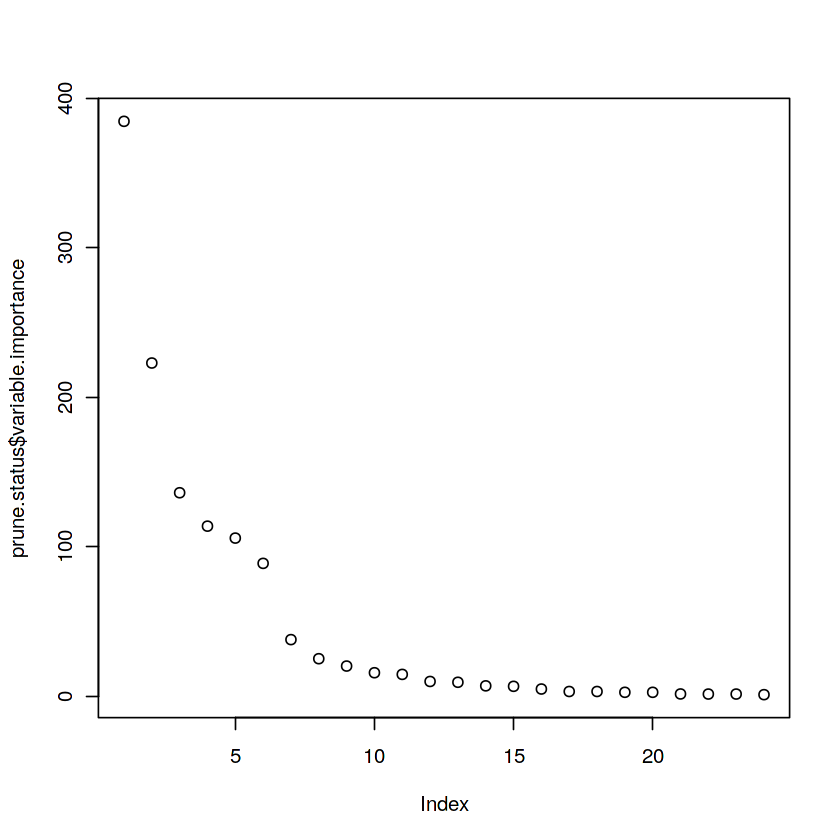

In [22]:
plot(prune.status$variable.importance)

Here is a plot of the relative importance of the above variables. As can be seen after about the 13th variable, the variables have about the same importance. As such only the first 13 variables are used for prediction: OCCUP, JOBPATYP, RX1O, CNCR1, PRIMARYSITE, RX2O, RX1OTH1, DOBYEAR, ACTLOTH, RX2OTH1, BRND1, HISTOLOGY, AND CNCR1STD

In [23]:
datasets <- list(background,beverages,lifestyle,exercise,family,food_hab,food,herbal,supplements,medical,medication,multi_vit,nutrient,smoking,tumor_train,vit_min,womens)
results=c()

for (i in seq(1,length(datasets))){
    results= c(results,'CNCR1'%in% names(datasets[[i]]))
    
    }
match(results,TRUE)

[1] NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA

Not important, just a little thing i made to check which questionaire each variable came from. you can use it too if you want. just replace the characters inside of the apostrophes (currently CNCR1) with the characters of whatever variable you want to find, for example OCCUP. after hitting shift + enter to run the cell, the result will be a list of NA and 1 . The position of the 1 corresponds to the position in the list datasets, at the top of this same cell. count over to see which questionaire it is.

In [24]:
optimized.tree.fit<- rpart(as.factor(PATIENTSTATUS)~OCCUP+JOBPATYP+RX1O+CNCR1+PRIMARYSITE+RX2O+RX1OTH1+DOBYEAR+ACTLOTH+RX2OTH1+BRND1+HISTOLOGY+CNCR1STD, data=tumor_train_all, method='class', control = model.control)

Running a new tree only with important variables

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”


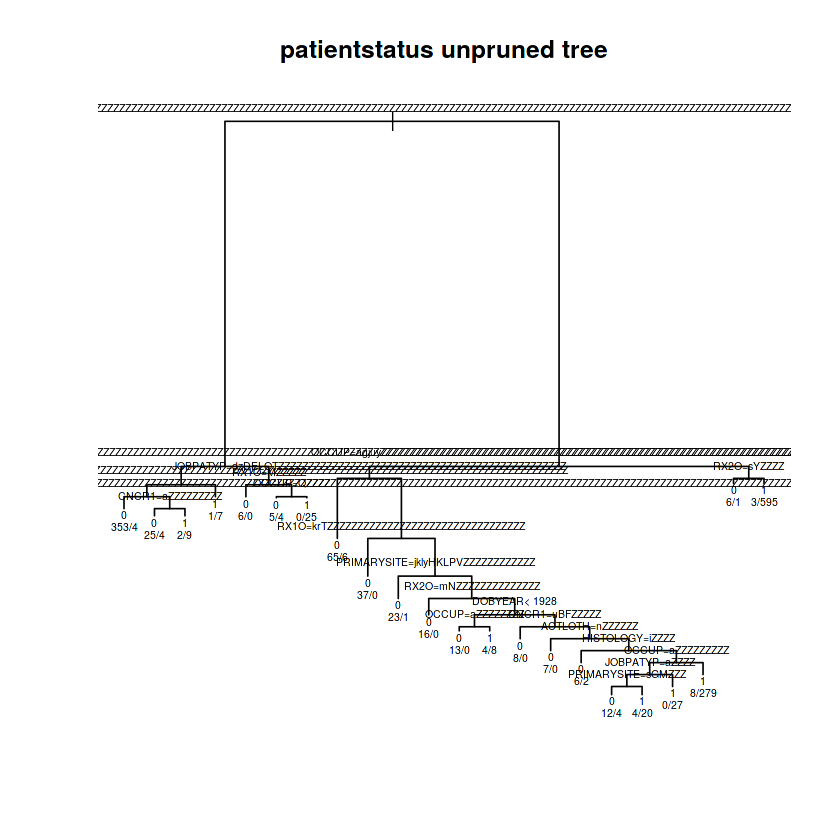

In [25]:
plot(optimized.tree.fit, main='patientstatus unpruned tree')
text(optimized.tree.fit, use.n=TRUE, cex = .5)


New unpruned tree with only important variables

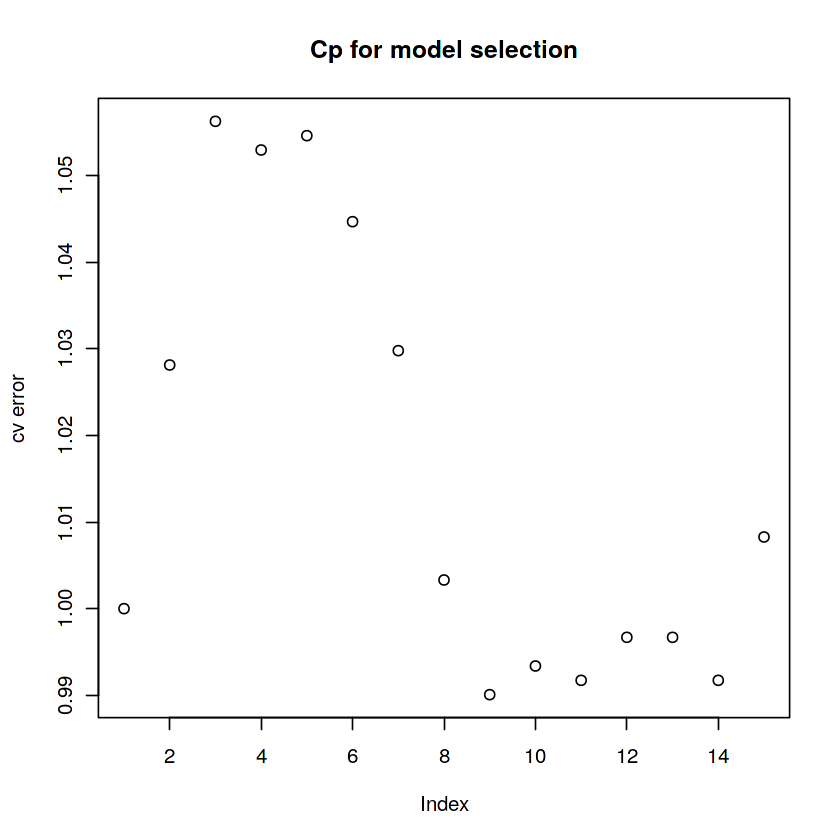

In [26]:
plot(optimized.tree.fit$cptable[,4], main = "Cp for model selection", ylab = 'cv error')

Checking which cp value to use based on complexity and accuracy

Warning message in labels.rpart(x, minlength = minlength):
“more than 52 levels in a predicting factor, truncated for printout”


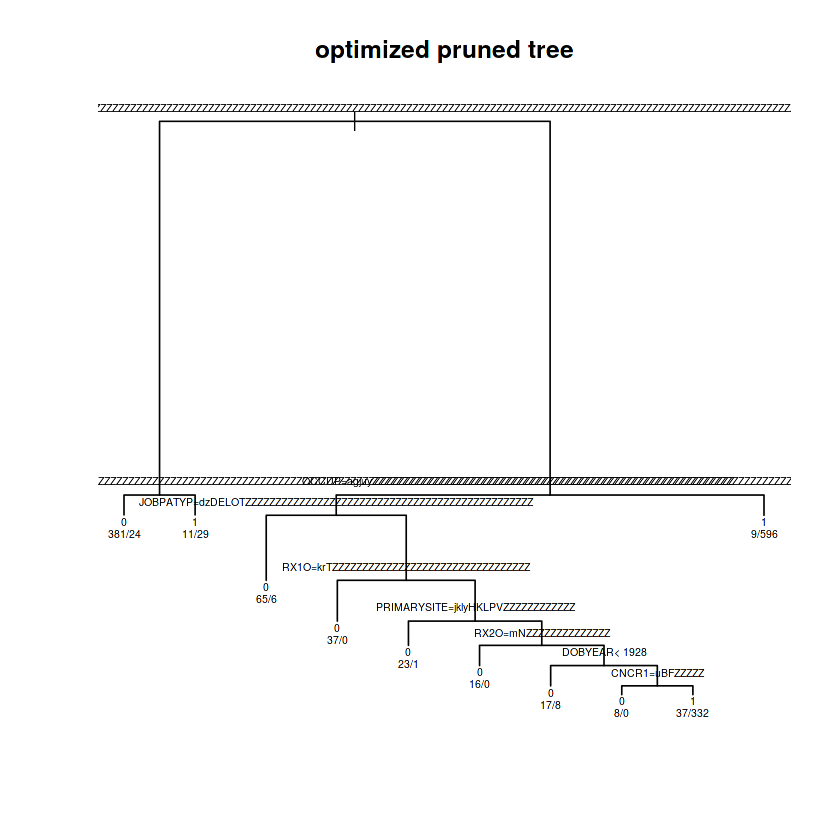

In [27]:
prune.opt <- prune(optimized.tree.fit, cp = optimized.tree.fit$cptable[8, 1])
plot(prune.opt, main='optimized pruned tree')
text(prune.opt, use.n=TRUE, cex = .5)

New pruned tree

In [28]:
seen_sites <- unique(tumor_train_all$PRIMARYSITE)
seen_hist<- unique(tumor_train_all$HISTOLOGY)
seen_test <- subset(tumor_test_all,subset=PRIMARYSITE %in% seen_sites & HISTOLOGY %in% seen_hist)
unseen_test <- subset(tumor_test_all,subset=!(PRIMARYSITE %in% seen_sites & HISTOLOGY %in% seen_hist))

Predicting the test data using the training presented some problems. Some of the test primary sites and histologies were not represented in the training data. as such the decision tree has no idea what to do with those To fix this i seperate the test data into those with values that are predictable with the model I've already made, and those that aren't. The predictable ones will simply be predicted. The unpredictable will have a new model made for them, not using the histology or primary site.

In [29]:
y_hat_tree <- predict(object=prune.opt, newdata= seen_test, type='class')

predicting the predictable data

In [30]:
result_seen_test <- cbind(seen_test,y_hat_tree)

combining the data with the new predictions

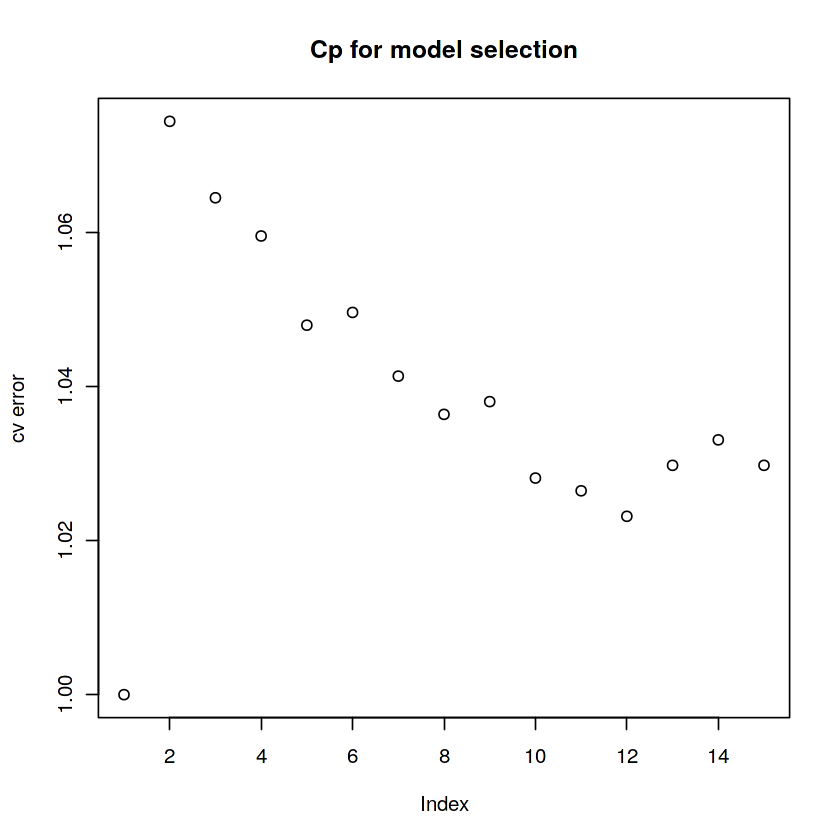

In [31]:
unseen.tree.fit<- rpart(as.factor(PATIENTSTATUS)~OCCUP+JOBPATYP+RX1O+CNCR1+RX2O+RX1OTH1+DOBYEAR+ACTLOTH+RX2OTH1+BRND1+CNCR1STD, data=tumor_train_all, method='class', control = model.control)
plot(unseen.tree.fit$cptable[,4], main = "Cp for model selection", ylab = 'cv error')

Creating a model for the data that we couldn't predict previously. Checking the cps like we did previously. cp of 10 is the best for being accurate and simple.

In [32]:
prune.uns <- prune(unseen.tree.fit, cp = unseen.tree.fit$cptable[10, 1])
y_hat_tree <- predict(object=prune.uns, newdata= unseen_test, type='class')
result_unseen_test <- cbind(unseen_test,y_hat_tree)


Make new pruned tree, predict the unppredictable people, and combine the predictions with the barcodes

In [33]:
result<- rbind(result_seen_test,result_unseen_test)

Combine the predictable and unpredictable people back together

In [34]:
result <- result[order(result$QBARCODE),]

Reorder the data based on barcode

In [35]:
output <- result[,c('QBARCODE','y_hat_tree')]
colnames(output)<- c('QBARCODE','PatientStatus')

create output as specified

In [36]:
output

,QBARCODE,PatientStatus
,<int>,<fct>
1,102,1
2,106,1
3,117,1
4,204,1
5,212,1
6,215,1
7,240,1
8,244,1
9,257,1


look at output

In [37]:
write.csv(output,file='Team5_submission3.csv',row.names=F)

create file

In [38]:
library(gbm)

load needed library

In [46]:
homogenous = apply(tumor_train_all, 2, function(var) length(unique(var)) == 1)
tumor_train_all[, !homogenous]

QBARCODE,SEX,DOBYEAR,AGE,COUNTRY,ETHN,ETHN1,ETHN2,ETHN3,ETHN4,⋯,EVRHRT,AGEHRT,HRTYRS,HRTNOW,MENOPAUSE,PRIMARYSITE,HISTOLOGY,GRADE,SEERSUMMSTAGE2000,PATIENTSTATUS
<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
100,2,1952,51,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,0,66,66,66,0,"Breast, lower-inner quadrant","Infiltrating duct carcinoma, NOS","Grade III: Poorly differentiated, dedifferentiated",3,1
104,2,1951,52,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,0,66,66,66,1,"Breast, upper-outer quadrant","Infiltrating duct carcinoma, NOS","Grade III: Poorly differentiated, dedifferentiated",3,1
105,2,1931,72,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,0,66,66,66,1,"Breast, lower-inner quadrant","Infiltrating duct carcinoma, NOS","Grade I: Well differentiated, differentiated, NOS",1,0
107,2,1936,69,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,1,5,3,0,1,"Breast, upper-outer quadrant","Infiltrating duct carcinoma, NOS","Grade II: Mod diff, mod well diff, intermediate diff",1,0
109,2,1948,55,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,0,66,66,66,1,"Breast, overlapping lesion","Infiltrating duct carcinoma, NOS","Grade II: Mod diff, mod well diff, intermediate diff",1,0
110,2,1965,38,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,0,66,66,66,0,"Breast, lower-outer quadrant",Intraductal ca plus 2 or more subtypes,"Grade II: Mod diff, mod well diff, intermediate diff",0,0
111,2,1944,59,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,1,4,4,0,1,"Breast, upper-outer quadrant","Infiltrating duct carcinoma, NOS","Grade I: Well differentiated, differentiated, NOS",1,0
112,2,1935,68,UNITED STATES OF AMERICA,0,66,66,66,66,⋯,0,66,66,66,1,"Breast, upper-inner quadrant","Lobular carcinoma, NOS","Grade I: Well differentiated, differentiated, NOS",3,0
113,2,1940,63,UNITED STATES OF AMERICA,1,0,1,0,0,⋯,1,5,3,0,1,"Breast, central portion","Infiltrating duct carcinoma, NOS","Grade III: Poorly differentiated, dedifferentiated",3,1


get rid of empty columns

In [ ]:
boost.fit <- gbm(PATIENTSTATUS~.-QBARCODE,data=tumor_train_all[,!homogenous],n.trees=50000,shrinkage=.5,interaction.depth=5,distribution='adaboost')

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 25: INSTYP1 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 26: INSTYP2 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 27: INSTYP3 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 28: INSTYP4 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 29: INSTYPNO has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 30: INSTYPO has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 31: INSTYPDK has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :

Run a boosting model. Boosting is like a decision tree, but instead of one tree it makes a lot of them. Each tree predicts the outcome based on what it thikns is most important, but as we go to the next tree the ones that were predicted wrong are given more "weight" than the ones that have already been easily predicted. As such the new decision trees are more scrutinous of how to predict the harder people. All of the trees are taken into account and used to make the final decision

In [50]:
y_hat_boost <- round(predict(boost.fit, newdata=tumor_test_all,n.trees=50000,type='response'))
y_hat_boost

Warning message in predict.gbm(boost.fit, newdata = tumor_test_all, n.trees = 50000, :
“Number of trees not specified or exceeded number fit so far. Using 10000.”


[1] 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 [38] 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 [75] 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
[112] 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
[149] 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1
[186] 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1
[223] 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
[260] 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
[297] 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1
[371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1

Predict test data based on boosting model

In [51]:
output$PatientStatus <- y_hat_boost

Put predictions in output

In [52]:
write.csv(output,file='Team5_submission5.csv',row.names=F)

make submission file